In [1]:
import numpy as np
import pandas as pd 
import os

In [3]:
telcom=pd.read_csv('telcocustomerchurn.csv')

In [7]:
print(telcom.head())

   Unnamed: 0_demographics Customer ID  Count_demographics  Gender  Age  \
0                     4006  0002-ORFBO                   1  Female   37   
1                     4788  0003-MKNFE                   1    Male   46   
2                     1901  0004-TLHLJ                   1    Male   50   
3                      395  0011-IGKFF                   1    Male   78   
4                      368  0013-EXCHZ                   1  Female   75   

  Under 30 Senior Citizen Married Dependents  Number of Dependents  ...  \
0       No             No     Yes         No                     0  ...   
1       No             No      No         No                     0  ...   
2       No             No      No         No                     0  ...   
3       No            Yes     Yes         No                     0  ...   
4       No            Yes     Yes         No                     0  ...   

   Device Protection Tech Support  Streaming TV_customerc  \
0                 No          Yes    

In [9]:
telcom.shape

(7043, 84)

In [11]:
telcom.describe()

,Unnamed: 0_demographics,Count_demographics,Age,Number of Dependents,Unnamed: 0_location,Count_location,Zip Code,Latitude,Longitude,Unnamed: 0,...,Unnamed: 0_status,Count_status,Satisfaction Score,Churn Value,Churn Score,CLTV,Unnamed: 0_customerc,LoyaltyID,Tenure,Monthly Charges
count,7043.000000,7043.0,7043.000000,7043.000000,7043.000000,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,1.0,46.509726,0.468692,3521.000000,1.0,93486.071134,36.197455,-119.756684,3521.000000,...,3521.000000,1.0,3.244924,0.265370,58.505040,4400.295755,3521.000000,550382.651001,32.371149,64.761692
std,2033.283305,0.0,16.750352,0.962802,2033.283305,0.0,1856.768045,2.468929,2.154425,2033.283305,...,2033.283305,0.0,1.201657,0.441561,21.170031,1183.057152,2033.283305,260776.118690,24.559481,30.090047
min,0.000000,1.0,19.000000,0.000000,0.000000,1.0,90001.000000,32.555828,-124.301372,0.000000,...,0.000000,1.0,1.000000,0.000000,5.000000,2003.000000,0.000000,100346.000000,0.000000,18.250000
25%,1760.500000,1.0,32.000000,0.000000,1760.500000,1.0,92101.000000,33.990646,-121.788090,1760.500000,...,1760.500000,1.0,3.000000,0.000000,40.000000,3469.000000,1760.500000,323604.500000,9.000000,35.500000
50%,3521.000000,1.0,46.000000,0.000000,3521.000000,1.0,93518.000000,36.205465,-119.595293,3521.000000,...,3521.000000,1.0,3.000000,0.000000,61.000000,4527.000000,3521.000000,548704.000000,29.000000,70.350000
75%,5281.500000,1.0,60.000000,0.000000,5281.500000,1.0,95329.000000,38.161321,-117.969795,5281.500000,...,5281.500000,1.0,4.000000,1.000000,75.500000,5380.500000,5281.500000,776869.000000,55.000000,89.850000
max,7042.000000,1.0,80.000000,9.000000,7042.000000,1.0,96150.000000,41.962127,-114.192901,7042.000000,...,7042.000000,1.0,5.000000,1.000000,96.000000,6500.000000,7042.000000,999912.000000,72.000000,118.750000


In [13]:
pd.isnull(telcom).sum()

Unnamed: 0_demographics        0
Customer ID                    0
Count_demographics             0
Gender                         0
Age                            0
                              ..
Paperless Billing_customerc    0
Payment Method_customerc       0
Monthly Charges                0
Total Charges_customerc        0
Churn                          0
Length: 84, dtype: int64

In [17]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 84 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0_demographics            7043 non-null   int64  
 1   Customer ID                        7043 non-null   object 
 2   Count_demographics                 7043 non-null   int64  
 3   Gender                             7043 non-null   object 
 4   Age                                7043 non-null   int64  
 5   Under 30                           7043 non-null   object 
 6   Senior Citizen                     7043 non-null   object 
 7   Married                            7043 non-null   object 
 8   Dependents                         7043 non-null   object 
 9   Number of Dependents               7043 non-null   int64  
 10  Unnamed: 0_location                7043 non-null   int64  
 11  Location ID                        7043 non-null   objec

In [25]:
telcom['Total Charges_customerc'] = pd.to_numeric(telcom['Total Charges_customerc'], errors='coerce')

In [27]:
pd.isnull(telcom["Total Charges_customerc"]).sum()

11

In [35]:
missing=telcom.isnull().sum().reset_index().rename(columns={0:'missNum'})

In [41]:
missing['missRate']=missing['missNum']/telcom.shape[0]

In [45]:
miss_analy=missing[missing.missRate>0].sort_values(by='missRate',ascending=False)

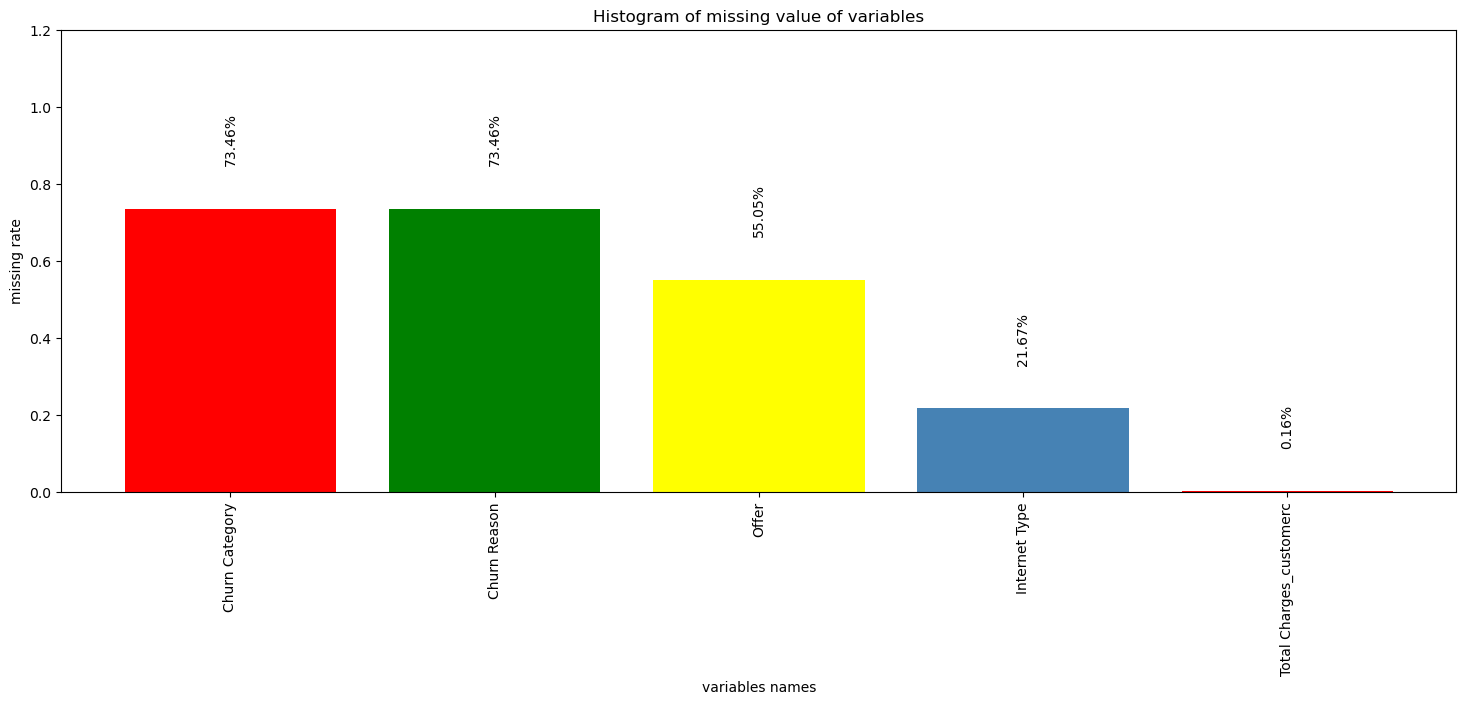

In [47]:
import matplotlib.pyplot as plt
import pylab as pl

fig = plt.figure(figsize=(18,6))
plt.bar(np.arange(miss_analy.shape[0]), list(miss_analy.missRate.values), align = 'center',color=['red','green','yellow','steelblue'])

plt.title('Histogram of missing value of variables')
plt.xlabel('variables names')
plt.ylabel('missing rate')
plt.xticks(np.arange(miss_analy.shape[0]),list(miss_analy['index']))
pl.xticks(rotation=90)
for x,y in enumerate(list(miss_analy.missRate.values)):
    plt.text(x,y+0.12,'{:.2%}'.format(y),ha='center',rotation=90)    
plt.ylim([0,1.2])

plt.show()

In [51]:
telcom['Total Charges_customerc'] = telcom['Total Charges_customerc'].fillna(telcom['Total Charges_customerc'].median())